# This is homework of second week.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's start with loading the dataframe

In [2]:
df = pd.read_csv('housing.csv')

Explore data

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

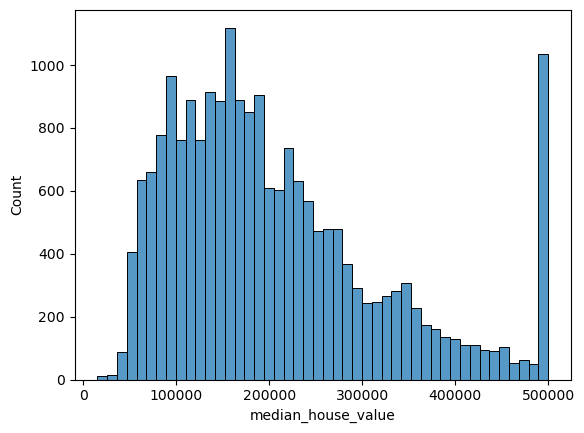

In [4]:
sns.histplot(df.median_house_value)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

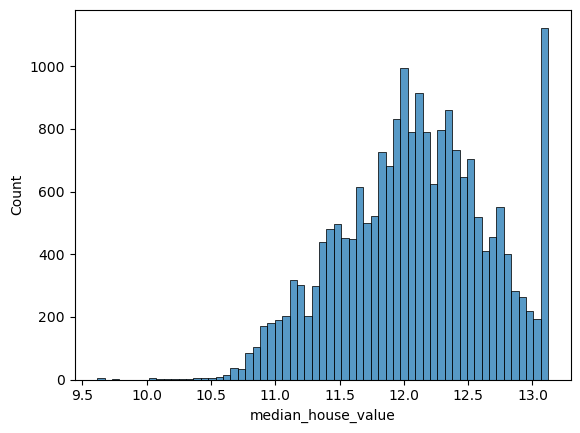

In [48]:
sns.histplot(np.log1p(df.median_house_value))

No tail in distribution. Now let's select features required for homework:

In [5]:
cols = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']

In [6]:
df = df[cols]

In [7]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


Question 1: Find a feature with missing values. How many missing values does it have?

In [8]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [9]:
df.isnull().sum().sum()

207

Question 2: What's the median (50% percentile) for variable 'population'?

In [10]:
df.population.median()

1166.0

Split the data

In [11]:
n = df.shape[0]
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n-n_val-n_test
print('N_train:'+str(n_train)+' N_val:'+str(n_val)+' N_test:'+str(n_test)+' N_total:'+str(n))

N_train:12384 N_val:4128 N_test:4128 N_total:20640


In [12]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train = df.iloc[idx[0:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

In [13]:
df_train = df_train.drop(columns=['median_house_value'])
df_val = df_val.drop(columns=['median_house_value'])
df_test = df_test.drop(columns=['median_house_value'])

Question 3

In [14]:
nan_pos_train=df_train[df_train.total_bedrooms.isnull()==True].index
nan_pos_val=df_val[df_val.total_bedrooms.isnull()==True].index
nan_pos_test=df_test[df_test.total_bedrooms.isnull()==True].index
nan_replace_with_mean = df_train.total_bedrooms.mean()

def train_linear_regression(X, y, r = 0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]).copy()

    XTX = X.T @ X 
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = (XTX_inv @ X.T) @ y
    
    return w

def predict_linear_regression(X,w):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]).copy()
    return X @ w

def rmse(a,b):
    return(np.mean((a-b)**2))**0.5

First Option -- filling nan with 0

In [15]:
nan_to_replace_with = 0.0
df_train.loc[nan_pos_train,'total_bedrooms']=nan_to_replace_with
df_val.loc[nan_pos_val,'total_bedrooms']=nan_to_replace_with
df_test.loc[nan_pos_test,'total_bedrooms']=nan_to_replace_with

X_train = df_train.values
X_val = df_val.values
X_test = df_test.values

reg_0 = train_linear_regression(X_train,y_train)

In [16]:
y_train_pred = predict_linear_regression(X_train,reg_0)

In [17]:
rmse(y_train_pred,y_train)

0.34131359101566794

In [18]:
y_val_pred = predict_linear_regression(X_val,reg_0)
round(rmse(y_val_pred,y_val), 2)

0.33

In [19]:
nan_to_replace_with = nan_replace_with_mean
df_train.loc[nan_pos_train,'total_bedrooms']=nan_to_replace_with
df_val.loc[nan_pos_val,'total_bedrooms']=nan_to_replace_with
df_test.loc[nan_pos_test,'total_bedrooms']=nan_to_replace_with

X_train = df_train.values
X_val = df_val.values
X_test = df_test.values

reg_mean = train_linear_regression(X_train,y_train)

In [20]:
y_val_pred = predict_linear_regression(X_val,reg_mean)
round(rmse(y_val_pred,y_val), 2)

0.33

Both options gives very similar RMSE

Question 4

In [21]:
nan_to_replace_with = 0.0
df_train.loc[nan_pos_train,'total_bedrooms']=nan_to_replace_with
df_val.loc[nan_pos_val,'total_bedrooms']=nan_to_replace_with
df_test.loc[nan_pos_test,'total_bedrooms']=nan_to_replace_with

X_train = df_train.values
X_val = df_val.values
X_test = df_test.values

In [45]:
r_list = [0.0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_list = []
for r in r_list:
    reg = train_linear_regression(X_train,y_train,r)
    y_val_pred = predict_linear_regression(X_val,reg)
    score = rmse(y_val_pred,y_val)
    rmse_list.append(score)
    print(round(score,2))

0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.34
0.34


In [46]:
rmse_list

[0.3295330365232624,
 0.32953303616486557,
 0.32953300096949245,
 0.32953270386682265,
 0.329531936599455,
 0.32969472053908533,
 0.3337887220007945,
 0.3392485345503637,
 0.3406063807810136]

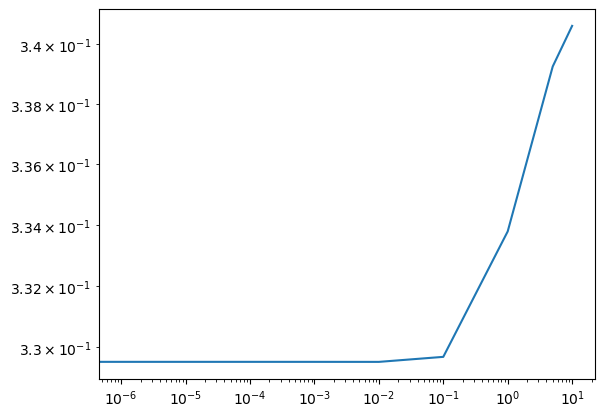

In [47]:
fig, ax = plt.subplots()
ax.plot(np.array(r_list), np.array(rmse_list))
ax.set_yscale('log')
ax.set_xscale('log')

Question 5

In [49]:
seed_vals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_seed_list = []
for seed in seed_vals:
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[0:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    y_train = np.log1p(df_train.median_house_value)
    y_val = np.log1p(df_val.median_house_value)
    y_test = np.log1p(df_test.median_house_value)
    df_train = df_train.drop(columns=['median_house_value'])
    df_val = df_val.drop(columns=['median_house_value'])
    df_test = df_test.drop(columns=['median_house_value'])
    nan_pos_train=df_train[df_train.total_bedrooms.isnull()==True].index
    nan_pos_val=df_val[df_val.total_bedrooms.isnull()==True].index
    nan_pos_test=df_test[df_test.total_bedrooms.isnull()==True].index
    nan_to_replace_with = 0.0
    df_train.loc[nan_pos_train,'total_bedrooms']=nan_to_replace_with
    df_val.loc[nan_pos_val,'total_bedrooms']=nan_to_replace_with
    df_test.loc[nan_pos_test,'total_bedrooms']=nan_to_replace_with
    X_train = df_train.values
    X_val = df_val.values
    X_test = df_test.values
    reg_0 = train_linear_regression(X_train,y_train)
    y_val_pred = predict_linear_regression(X_val,reg)
    score = rmse(y_val_pred,y_val)
    rmse_seed_list.append(score)
    print(round(score,2))

0.37
0.36
0.36
0.35
0.36
0.34
0.36
0.35
0.35
0.35


In [50]:
rmse_seed_list

[0.3673590373158976,
 0.35569404702322394,
 0.35545776507128884,
 0.34883720617356523,
 0.35537429795853165,
 0.3426709440969378,
 0.355223215584401,
 0.35295497578911417,
 0.3495787161143451,
 0.35168176888034713]

In [51]:
round(np.std(rmse_seed_list), 3)

0.006

Question 6

In [57]:
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[0:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_full_train = pd.concat([df_train,df_val])
y_full_train = np.log1p(df_full_train.median_house_value)
y_test = np.log1p(df_test.median_house_value)
df_full_train = df_full_train.drop(columns=['median_house_value'])
df_test = df_test.drop(columns=['median_house_value'])
nan_pos_full_train=df_full_train[df_full_train.total_bedrooms.isnull()==True].index
nan_pos_test=df_test[df_test.total_bedrooms.isnull()==True].index
nan_to_replace_with = 0.0
df_full_train.loc[nan_pos_full_train,'total_bedrooms']=nan_to_replace_with
df_test.loc[nan_pos_test,'total_bedrooms']=nan_to_replace_with
X_full_train = df_full_train.values
X_test = df_test.values
reg_0 = train_linear_regression(X_full_train,y_full_train)
y_test_pred = predict_linear_regression(X_test,reg)
score = rmse(y_val_pred,y_val)
rmse_seed_list.append(score)
print(round(score,3))

0.352
